In [1]:
 ! pip install -q kaggle
 from google.colab import files
 files.upload()
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/ kaggle.json


Saving kaggle.json to kaggle.json


In [6]:
! kaggle datasets download mahdavi1202/skin-cancer

Dataset URL: https://www.kaggle.com/datasets/mahdavi1202/skin-cancer
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 3.33G/3.35G [00:41<00:01, 17.2MB/s]
100% 3.35G/3.35G [00:41<00:00, 86.8MB/s]


In [7]:
 ! pip install unzip
 !unzip "/content/skin-cancer.zip" -d "skin-cancer"

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1281 sha256=d62d263801686c02e15743cb3c3d55cc66d630048f28f0a68ff1c3fcb9f3230b
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip
Archive:  /content/skin-cancer.zip
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_100_393_595.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_100_393_898.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_101_1041_651.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_101_1041_658.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_101_1041_898.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_104_1754_276.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_104_1755_320.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_104_1756_151.png  
  inflating: skin-cancer/imgs_part_1/imgs_part_1/PAT_106_158_249.png  


In [8]:
!pip install augmentor
import os
import shutil
import cv2
from PIL import Image
import shutil
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [11]:
path_to_data = 'skin-cancer'
os.listdir(path_to_data)

['imgs_part_3', 'imgs_part_1', 'imgs_part_2', 'metadata.csv']

In [12]:
destination_folder = 'all_images'
os.mkdir(destination_folder)

def move_file_to_dest_folder(path, dest):

    for file in os.listdir(path):
        shutil.copy(os.path.join(path, file), os.path.join(dest, file))

move_file_to_dest_folder(os.path.join(path_to_data, 'imgs_part_1', 'imgs_part_1'), destination_folder)
move_file_to_dest_folder(os.path.join(path_to_data, 'imgs_part_2', 'imgs_part_2'), destination_folder)
move_file_to_dest_folder(os.path.join(path_to_data, 'imgs_part_3', 'imgs_part_3'), destination_folder)

print(len(os.listdir(destination_folder)))

2298


In [13]:
metadata = pd.read_csv(os.path.join(path_to_data, 'metadata.csv'))
metadata.head(10)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True
5,PAT_1549,1882,NaN,NaN,NaN,NaN,53,NaN,NaN,NaN,...,NaN,SEK,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_1549_1882_230.png,False
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_117_179_983.png,True
8,PAT_1995,4080,NaN,NaN,NaN,NaN,68,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,PAT_1995_4080_695.png,False
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_705_4015_413.png,False


In [14]:
for i in metadata.columns:
    print(i,metadata[str(i)].isnull().sum())



patient_id 0
lesion_id 0
smoke 804
drink 804
background_father 818
background_mother 822
age 0
pesticide 804
gender 804
skin_cancer_history 804
cancer_history 804
has_piped_water 804
has_sewage_system 804
fitspatrick 804
region 0
diameter_1 804
diameter_2 804
diagnostic 0
itch 0
grew 0
hurt 0
changed 0
bleed 0
elevation 0
img_id 0
biopsed 0


In [15]:
gender_values = ['MALE', 'FEMALE']
metadata['gender'] = metadata['gender'].fillna(pd.Series(np.random.choice(gender_values, size=len(metadata.index))))

In [16]:
mean_diameter = metadata['diameter_2'].mean()
metadata['diameter_2'] = metadata['diameter_2'].fillna(mean_diameter)

In [17]:


metadata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               2298 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [18]:
labels = metadata[['diagnostic', 'img_id']]
labels

,diagnostic,img_id
0,NEV,PAT_1516_1765_530.png
1,BCC,PAT_46_881_939.png
2,ACK,PAT_1545_1867_547.png
3,ACK,PAT_1989_4061_934.png
4,BCC,PAT_684_1302_588.png
...,...,...
2293,ACK,PAT_1708_3156_175.png
2294,BCC,PAT_46_880_140.png
2295,SEK,PAT_1343_1217_404.png
2296,BCC,PAT_326_690_823.png


In [19]:
labels.loc[labels['img_id'] == 'PAT_1042_187_746.png']

,diagnostic,img_id
413,ACK,PAT_1042_187_746.png


In [20]:
labels['diagnostic'].unique()

array(['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL'], dtype=object)

In [21]:
class_idx = {'NEV':0, 'BCC':1, 'ACK':2, 'SEK':3, 'SCC':4, 'MEL':5}

labels['targets'] = labels['diagnostic'].map(class_idx)
labels

,diagnostic,img_id,targets
0,NEV,PAT_1516_1765_530.png,0
1,BCC,PAT_46_881_939.png,1
2,ACK,PAT_1545_1867_547.png,2
3,ACK,PAT_1989_4061_934.png,2
4,BCC,PAT_684_1302_588.png,1
...,...,...,...
2293,ACK,PAT_1708_3156_175.png,2
2294,BCC,PAT_46_880_140.png,1
2295,SEK,PAT_1343_1217_404.png,3
2296,BCC,PAT_326_690_823.png,1


In [22]:
labels['diagnostic'].value_counts()

,count
diagnostic,
BCC,845
ACK,730
NEV,244
SEK,235
SCC,192
MEL,52


<Axes: xlabel='diagnostic'>

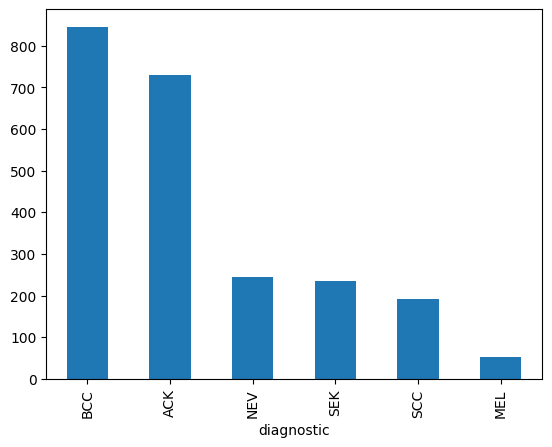

In [23]:
labels['diagnostic'].value_counts().plot.bar()

In [24]:
diagnostic_folders = metadata['diagnostic'].unique()

# Create a folder for each diagnostic class
for diagnostic_class in diagnostic_folders:
    os.makedirs(os.path.join('diagnostic_images', diagnostic_class), exist_ok=True)

# Move images to their respective diagnostic folders
for index, row in metadata.iterrows():
    img_id = row['img_id']
    diagnostic_class = row['diagnostic']
    src_path = os.path.join('all_images', img_id)  # Assuming 'all_images' is the folder containing all images
    dest_path = os.path.join('diagnostic_images', diagnostic_class, img_id)
    shutil.copy(src_path, dest_path)

In [25]:
diagnostic_images_folder = 'diagnostic_images'

# Iterate over each diagnostic class folder
for diagnostic_class in os.listdir(diagnostic_images_folder):
    class_folder_path = os.path.join(diagnostic_images_folder, diagnostic_class)

    # Count the number of images in the folder
    num_images = len(os.listdir(class_folder_path))

    # Print the number of images in the folder
    print(f"Diagnostic class: {diagnostic_class}, Number of images: {num_images}")

Diagnostic class: BCC, Number of images: 845
Diagnostic class: SEK, Number of images: 235
Diagnostic class: SCC, Number of images: 192
Diagnostic class: MEL, Number of images: 52
Diagnostic class: NEV, Number of images: 244
Diagnostic class: ACK, Number of images: 730


In [26]:
!zip -r puk.zip /content/diagnostic_images

  adding: content/diagnostic_images/ (stored 0%)
  adding: content/diagnostic_images/BCC/ (stored 0%)
  adding: content/diagnostic_images/BCC/PAT_652_1231_516.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_568_1066_235.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_35_48_43.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_229_349_256.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_441_861_415.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_46_881_939.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_767_1501_691.png (deflated 1%)
  adding: content/diagnostic_images/BCC/PAT_545_1029_650.png (deflated 1%)
  adding: content/diagnostic_images/BCC/PAT_177_274_371.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_833_1571_134.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_474_912_879.png (deflated 0%)
  adding: content/diagnostic_images/BCC/PAT_257_396_494.png (deflated 0%)
  adding:

In [27]:
!pip install split-folders

In [28]:
import splitfolders


In [38]:
splitfolders.ratio(input = "/content/diagnostic_images",
    output="/content/diagnostic_images-org-Splitted",
    seed=1337,
    ratio=(0.7, 0.15, 0.15),  # Fixed ratios
    move=False  # Copy files instead of moving (safer)
)

Copying files: 2298 files [00:42, 54.55 files/s]


In [40]:
diagnostic_images_folder = '/content/diagnostic_images-org-Splitted/train'

# Iterate over each diagnostic class folder
for diagnostic_class in os.listdir(diagnostic_images_folder):
    class_folder_path = os.path.join(diagnostic_images_folder, diagnostic_class)

    # Count the number of images in the folder
    num_images = len(os.listdir(class_folder_path))

    # Print the number of images in the folder
    print(f"Diagnostic class: {diagnostic_class}, Number of images: {num_images}")

Diagnostic class: BCC, Number of images: 591
Diagnostic class: SEK, Number of images: 164
Diagnostic class: SCC, Number of images: 134
Diagnostic class: MEL, Number of images: 36
Diagnostic class: NEV, Number of images: 170
Diagnostic class: ACK, Number of images: 510


In [41]:
diagnostic_images_folder = '/content/diagnostic_images-org-Splitted/test'

# Iterate over each diagnostic class folder
for diagnostic_class in os.listdir(diagnostic_images_folder):
    class_folder_path = os.path.join(diagnostic_images_folder, diagnostic_class)

    # Count the number of images in the folder
    num_images = len(os.listdir(class_folder_path))

    # Print the number of images in the folder
    print(f"Diagnostic class: {diagnostic_class}, Number of images: {num_images}")

Diagnostic class: BCC, Number of images: 128
Diagnostic class: SEK, Number of images: 36
Diagnostic class: SCC, Number of images: 30
Diagnostic class: MEL, Number of images: 9
Diagnostic class: NEV, Number of images: 38
Diagnostic class: ACK, Number of images: 111


In [ ]:
!python "brain1chanal-32-cnnasl.py"    --dataset skin  --num_labeled 15 --num_valid_samples 0 --root_dir experiments/ --data_dir data/skin/ --batch_size 32 --arch dense  --dropout 0.0 --mixup_consistency 0 --pseudo_label mean_teacher  --consistency_rampup_starts 0 --consistency_rampup_ends 100 --epochs 100 --lr_rampdown_epochs 450 --print_freq 200 --momentum 0.9 --lr 0.001 --ema_decay 0.999  --mixup_sup_alpha 0 --mixup_usup_alpha 0

In [ ]:
!python "skinfull.py"    --dataset skin  --num_labeled 15 --num_valid_samples 0 --root_dir experiments/ --data_dir data/skin/ --batch_size 32 --arch dense  --dropout 0.0 --mixup_consistency 0 --pseudo_label mean_teacher  --consistency_rampup_starts 0 --consistency_rampup_ends 100 --epochs 100 --lr_rampdown_epochs 450 --print_freq 200 --momentum 0.9 --lr 0.001 --ema_decay 0.999  --mixup_sup_alpha 0 --mixup_usup_alpha 0

In [ ]:
    from utils import *
    trainloader, validloader, unlabelledloader, test_loader, num_classes = load_data_subset(1, 32, 1,'skin', 'data/skin/', labels_per_class = 30, valid_labels_per_class = 0)
    #num_classes=10

In [ ]:

from models import DenseNet121
from lenet14 import *
C=DenseNet121(out_size=6, mode='U-Ones', drop_rate=0.2)

#C_optimizer = optim.SGD(C.parameters(), lr=0.1, momentum=momentum)
#C.load_state_dict(torch.load('E:/3070/boosting/gan/proposal-iraji/paper03/ICT-master/ICT-master/experiments/s/_C.pkl'))
C.load_state_dict(torch.load('D:/bad-gans-skin-temp/experiments/s/exp-dense-30-v2/_C.pkl'))

C.cuda()


In [ ]:
    import torch.nn as nn
    import torch.nn.functional as F
    import os, gzip, torch


    class_criterion = nn.CrossEntropyLoss().cuda()


In [ ]:
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    #labeled_minibatch_size = max(target.ne(NO_LABEL).sum(), 1e-8).type(torch.cuda.FloatTensor)
    minibatch_size = len(target)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / minibatch_size))
    return res

In [ ]:
 NO_LABEL=-1

def validate(eval_loader, model):
    class_criterion = nn.CrossEntropyLoss(reduction='sum', ignore_index=NO_LABEL).cuda()
    # switch to evaluate mode
    model.eval()

    for i, (input, target) in enumerate(eval_loader):

        #if args.dataset == 'cifar10':
            #input = apply_zca(input, zca_mean, zca_components)

        with torch.no_grad():
            input_var = torch.autograd.Variable(input.cuda())
        with torch.no_grad():
            target_var = torch.autograd.Variable(target.cuda())

        minibatch_size = len(target_var)
        labeled_minibatch_size = target_var.data.ne(NO_LABEL).sum().type(torch.cuda.FloatTensor)

        # compute output
        output1 = model(input_var)
        softmax1 = F.softmax(output1, dim=1)
        class_loss = class_criterion(output1, target_var) / minibatch_size

        # measure accuracy and record loss
        prec1, prec5 = accuracy(output1.data, target_var.data, topk=(1, 6))



    return prec1[0]


In [ ]:
acc = validate(test_loader, C)
print(acc)

In [ ]:
            test_loss = 0
            correct = 0
            with torch.no_grad():
                for data, target in test_loader:
                    #print(data.shape)
                    data, target = data.cuda(), target.cuda()
                    output = C(data)
                    F.log_softmax(output, dim=1)
                    #test_loss += F.nll_loss(F.log_softmax(output, dim=1), target, reduction='sum').item()  # sum up batch loss
                    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                    correct += pred.eq(target.view_as(pred)).sum().item()

            test_loss /= len(test_loader.dataset)

            acc = 100. * correct / len(test_loader.dataset)
            print(acc)


In [ ]:
                        from sklearn.metrics import confusion_matrix
                        import seaborn as sn
                        import pandas as pd
                        import matplotlib.pyplot as plt

                        y_pred = []
                        y_true = []

                        # iterate over test data
                        for inputs, labels in test_loader:
                                inputs, labels = inputs.cuda(), labels.cuda()

                                output = C(inputs) # Feed Network

                                output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
                                y_pred.extend(output) # Save Prediction

                                labels = labels.data.cpu().numpy()
                                y_true.extend(labels) # Save Truth

                        # constant for classes
                        classes = ('0', '1', '2','3','4','5')

                        # Build confusion matrix
                        cf_matrix = confusion_matrix(y_true, y_pred)
                        #df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                                            # columns = [i for i in classes])
                        df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                                            columns = [i for i in classes])
                        plt.figure(figsize = (12,7))
                        sn.heatmap(df_cm, annot=True,fmt="d", cmap='Greys',cbar=True)
                        plt.xlabel("Predicted lable")
                        plt.ylabel("True label (ground truth)")
                        plt.savefig('output.png')
                        plt.savefig('output.pdf')




In [ ]:
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
    from imblearn.metrics import specificity_score,sensitivity_score,geometric_mean_score,classification_report_imbalanced
    print('full specificity_score',specificity_score(y_true, y_pred, average='weighted'))
    print('any specificity_score',specificity_score(y_true, y_pred, average=None))
    print('full sensitivity_score',sensitivity_score(y_true, y_pred, average='weighted'))
    print('any sensitivity_score',sensitivity_score(y_true, y_pred, average=None))
    print('full geometric_mean_score',geometric_mean_score(y_true, y_pred, average='weighted'))
    print('any geometric_mean_score',geometric_mean_score(y_true, y_pred, average=None))
    print(classification_report_imbalanced(y_true, y_pred,     target_names=classes,digits=6))
    print(accuracy_score(y_true, y_pred))